In [1]:
#import packages

In [51]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Python3\python.exe -m pip install --upgrade pip' command.


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import math
from numpy import nan
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from pylab import *
%matplotlib inline
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import dataset

In [4]:
usdaHoney = pd.read_csv("C:/Users/srjoh/OneDrive/Documents/WOZ-U/Final Project/datasets/FinalusdaHoney3.csv")

In [19]:
usdaHoney.head()

,Commodity_Description,Year,Production_MT
0,"Almonds, Shelled Basis",1998,235884.0
1,"Almonds, Shelled Basis",1999,377800.0
2,"Almonds, Shelled Basis",2000,318900.0
3,"Almonds, Shelled Basis",2001,376500.0
4,"Almonds, Shelled Basis",2002,494416.0


In [6]:
#Pivot data to index by year with commodity name as columns and values by row

In [20]:
pivoted = usdaHoney.pivot(index='Year', columns='Commodity_Description', values='Production_MT')\
            .reset_index()
pivoted.columns.name=None
print(pivoted)

    Year  Almonds, Shelled Basis  Apples, Fresh     Barley  Coffee, Green  \
0   1998                235884.0      5282724.0  7655000.0        13920.0   
1   1999                377800.0      5746060.0  5922000.0         9780.0   
2   2000                318900.0      5675890.0  6919000.0        11100.0   
3   2001                376500.0      5065060.0  5407000.0        10980.0   
4   2002                494416.0      4605810.0  4940000.0         9780.0   
5   2003                471740.0      4780600.0  6059000.0         9780.0   
6   2004                462664.0      5683040.0  6091000.0        11160.0   
7   2005                415040.0      5261960.0  4613000.0         8760.0   
8   2006                508023.0      5351610.0  3984000.0        10320.0   
9   2007                630500.0      4154195.0  5030000.0        10320.0   
10  2008                739400.0      4508344.0  5230000.0        10260.0   
11  2009                639600.0      4505000.0  4951000.0        10200.0   

In [8]:
#remove unwanted columns

In [21]:
pivoted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         15 non-null     int64  
 1   Almonds, Shelled Basis       15 non-null     float64
 2   Apples, Fresh                15 non-null     float64
 3   Barley                       15 non-null     float64
 4   Coffee, Green                15 non-null     float64
 5   Corn                         15 non-null     float64
 6   Cotton                       15 non-null     float64
 7   Dairy, Milk, Fluid           15 non-null     float64
 8   Filberts, Inshell Basis      15 non-null     float64
 9   Fresh Cherries,(Sweet&Sour)  15 non-null     float64
 10  Fresh Peaches & Nectarines   15 non-null     float64
 11  Grapefruit, Fresh            15 non-null     float64
 12  Grapes, Fresh                15 non-null     float64
 13  Honey                 

In [22]:
usdaHoneyMisc=pivoted[['Year', 'Coffee, Green', 'Cotton', 'Honey', 'Sugar, Centrifugal']]

In [11]:
usdaHoneyMisc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                15 non-null     int64  
 1   Coffee, Green       15 non-null     float64
 2   Cotton              15 non-null     float64
 3   Honey               15 non-null     float64
 4   Sugar, Centrifugal  15 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 728.0 bytes


In [13]:
#Correlation Matrix

In [24]:
Matrix = usdaHoneyMisc.corr()
print (Matrix)

                        Year  Coffee, Green    Cotton     Honey  \
Year                1.000000      -0.715330  0.030488 -0.868987   
Coffee, Green      -0.715330       1.000000 -0.182250  0.667521   
Cotton              0.030488      -0.182250  1.000000 -0.092651   
Honey              -0.868987       0.667521 -0.092651  1.000000   
Sugar, Centrifugal -0.138870       0.005788 -0.093965  0.279058   

                    Sugar, Centrifugal  
Year                         -0.138870  
Coffee, Green                 0.005788  
Cotton                       -0.093965  
Honey                         0.279058  
Sugar, Centrifugal            1.000000  


In [15]:
#heatmap visual

<AxesSubplot:>

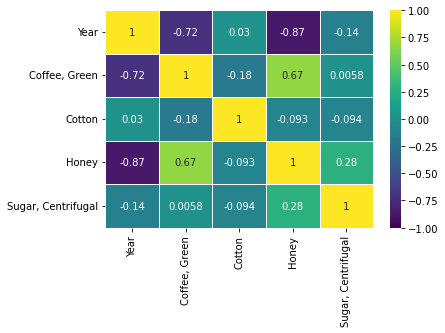

In [25]:
sns.heatmap(Matrix, annot = True, cmap='viridis',vmin=-1,vmax=1, linewidth = 1)

In [17]:
#how has production of coffee changed over time (1998-2012) within current USDA dataset for US production only

In [28]:
Coffee= usdaHoneyMisc[['Year','Coffee, Green',]]
Coffee

,Year,"Coffee, Green"
0,1998,13920.0
1,1999,9780.0
2,2000,11100.0
3,2001,10980.0
4,2002,9780.0
5,2003,9780.0
6,2004,11160.0
7,2005,8760.0
8,2006,10320.0
9,2007,10320.0


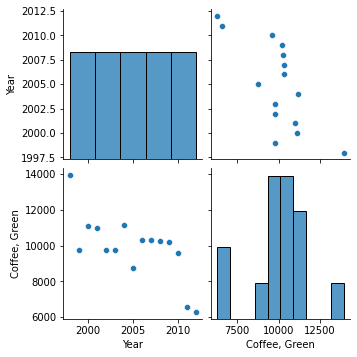

In [29]:
sns.pairplot(Coffee)

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

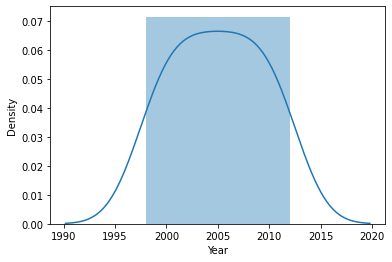

In [30]:
sns.distplot(Coffee['Year'])

In [ ]:
#distribution appears normal, however histogram and scatterplots indicate little variance from year to year

<AxesSubplot:xlabel='Coffee, Green', ylabel='Density'>

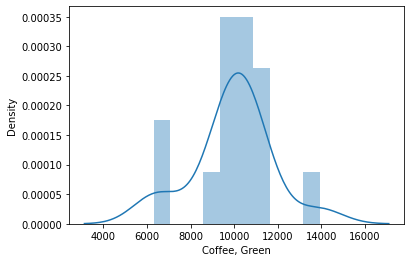

In [62]:
sns.distplot(Coffee['Coffee, Green'])

In [ ]:
#distribution appears mostly normal

In [55]:
x1 = Coffee['Year']
y = Coffee['Coffee, Green']

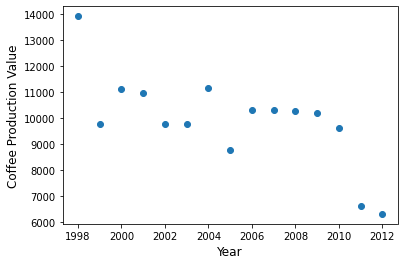

In [56]:
plt.scatter(x1,y)
 
plt.xlabel('Year', fontsize = 12)
 
plt.ylabel('Coffee Production Value', fontsize = 12)
 
plt.show()

In [57]:
x = sm.add_constant(x1)
model = sm.OLS(y,x).fit()
model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Coffee, Green   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     13.62
Date:                Fri, 15 Jul 2022   Prob (F-statistic):            0.00272
Time:                        20:14:36   Log-Likelihood:                -127.96
No. Observations:                  15   AIC:                             259.9
Df Residuals:                      13   BIC:                             261.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.925e+05   1.58e+05      3.754      0.002    2.52e+05    9.34e+05
Year        -290.5714     78.726     -3.691      0.003    -460.649    -120.494
==============================================================================
Omnibus:                        4.100   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.129   Jarque-Bera (JB):                1.289
Skew:                          -0.068   Prob(JB):                        0.525
Kurtosis:                       1.570   Cond. No.                     9.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#test for homoscedasticity

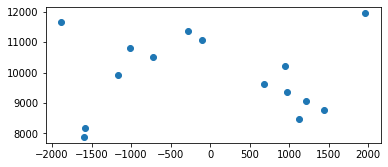

In [63]:
pred_val=model.fittedvalues.copy()
true_val=Coffee['Coffee, Green'].values.copy()
residual=true_val-pred_val

fig, ax=plt.subplots(figsize=(6,2.5))
_=ax.scatter(residual, pred_val)

In [64]:
sms.diagnostic.het_breuschpagan(residual, Coffee[['Year']])

(9.55127424923668, nan, 24.541121283371776, 0.0002119046034772082)

In [ ]:
#p value significant - data is heteroscedastic

In [65]:
#test for homoscedasticity with Harvey Collier 

In [66]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=0.6102597680015467, pvalue=0.5540881852176911)

In [ ]:
#p value not significant, met assumption for homoscedasticity

In [67]:
#screening for outliers

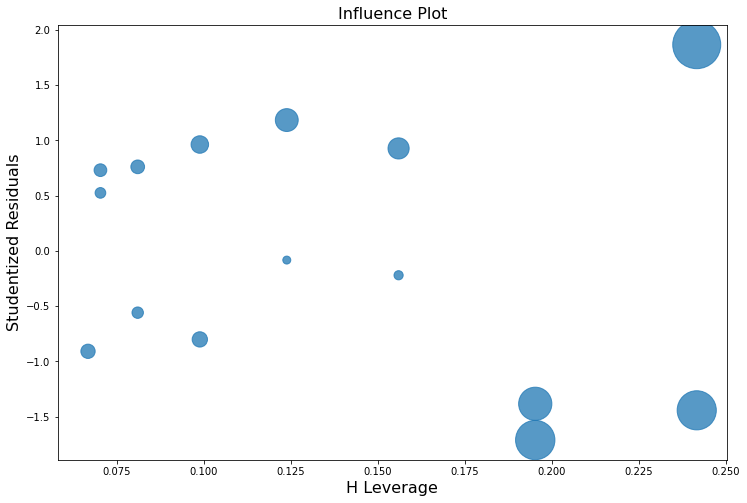

In [68]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, alpha = .05, ax = ax, criterion="cooks")

In [ ]:
#there are no row numbers next to any points and all points fit within range so there are no outliers

In [69]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Coffee, Green   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     13.62
Date:                Fri, 15 Jul 2022   Prob (F-statistic):            0.00272
Time:                        22:56:34   Log-Likelihood:                -127.96
No. Observations:                  15   AIC:                             259.9
Df Residuals:                      13   BIC:                             261.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.925e+05   1.58e+05      3.754      0.002    2.52e+05    9.34e+05
Year        -290.5714     78.726     -3.691      0.003    -460.649    -120.494
==============================================================================
Omnibus:                        4.100   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.129   Jarque-Bera (JB):                1.289
Skew:                          -0.068   Prob(JB):                        0.525
Kurtosis:                       1.570   Cond. No.                     9.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#p value - Prob(F-statistic) under .05 so there is a significant change in coffee production over time. Time accounts for 47% of the change in coffee production (adj R-squared)

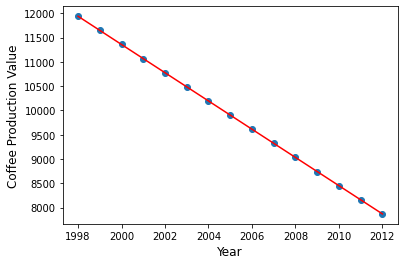

In [61]:
plt.scatter(x1,y)
 
y = -290.5714*x1 + 592500
 
fig = plt.plot(x1,y, c='red', label = 'regression')
 
plt.xlabel('Year', fontsize = 12)
 
plt.ylabel('Coffee Production Value', fontsize = 12)
 
plt.show()

In [70]:
#what is the linear relationship between Honey and Coffee within current USDA dataset for US production only

In [78]:
CoffeeHoney= usdaHoneyMisc[['Year','Honey','Coffee, Green',]]
CoffeeHoney

,Year,Honey,"Coffee, Green"
0,1998,99571.62321,13920.0
1,1999,91800.71933,9780.0
2,2000,99589.31322,11100.0
3,2001,84253.43532,10980.0
4,2002,77684.09135,9780.0
5,2003,82268.52548,9780.0
6,2004,82884.04711,11160.0
7,2005,78910.59871,8760.0
8,2006,69960.81442,10320.0
9,2007,66959.40939,10320.0


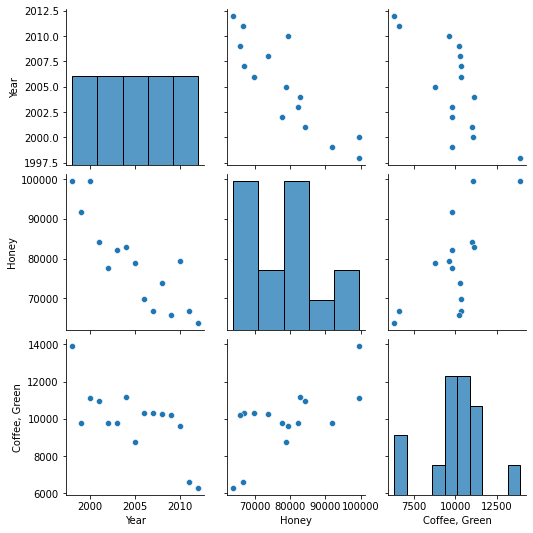

In [79]:
sns.pairplot(CoffeeHoney)

<AxesSubplot:xlabel='Honey', ylabel='Density'>

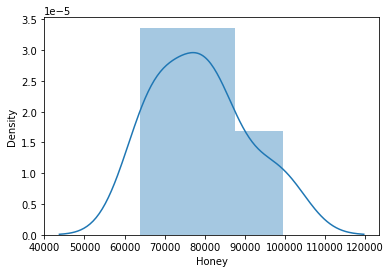

In [80]:
sns.distplot(CoffeeHoney['Honey'])

In [81]:
#curve for honey production has a mostly normal distribution

In [91]:
x1 = CoffeeHoney['Honey']
yy = CoffeeHoney['Coffee, Green']

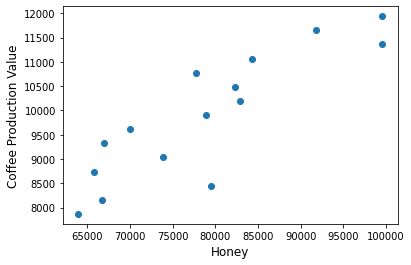

In [92]:
plt.scatter(x1,y)
 
plt.xlabel('Honey', fontsize = 12)
 
plt.ylabel('Coffee Production Value', fontsize = 12)
 
plt.show()

In [93]:
x = sm.add_constant(x1)
model = sm.OLS(y,x).fit()
model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Year   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     40.09
Date:                Sat, 16 Jul 2022   Prob (F-statistic):           2.61e-05
Time:                        09:05:33   Log-Likelihood:                -117.76
No. Observations:                  15   AIC:                             239.5
Df Residuals:                      13   BIC:                             240.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2193.5233   1229.927      1.783      0.098    -463.573    4850.619
Honey          0.0977      0.015      6.332      0.000       0.064       0.131
==============================================================================
Omnibus:                        2.226   Durbin-Watson:                   1.501
Prob(Omnibus):                  0.329   Jarque-Bera (JB):                1.001
Skew:                          -0.630   Prob(JB):                        0.606
Kurtosis:                       3.119   Cond. No.                     5.69e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#test for hmoscedasticity

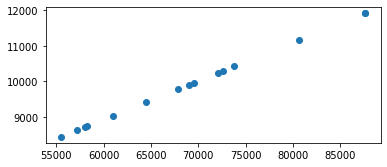

In [95]:
pred_val=model.fittedvalues.copy()
true_val=CoffeeHoney['Honey'].values.copy()
residual=true_val-pred_val

fig, ax=plt.subplots(figsize=(6,2.5))
_=ax.scatter(residual, pred_val)

In [96]:
sms.diagnostic.het_breuschpagan(residual, CoffeeHoney[['Honey']])

(14.67165274701326, nan, 625.5667942697279, 5.093575135158116e-13)

In [98]:
#p value significant - data is heteroscedastic

In [99]:
#test for homoscedasticity with Harvey Collier 

In [100]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=-4.304244160860178, pvalue=0.0012470776568363467)

In [101]:
#p value significant - data is heteroscedastic

In [102]:
#Testing for Multicolinearity

In [105]:
CoffeeHoneycorr= pivoted[['Coffee, Green','Honey',]]
CoffeeHoneycorr

,"Coffee, Green",Honey
0,13920.0,99571.62321
1,9780.0,91800.71933
2,11100.0,99589.31322
3,10980.0,84253.43532
4,9780.0,77684.09135
5,9780.0,82268.52548
6,11160.0,82884.04711
7,8760.0,78910.59871
8,10320.0,69960.81442
9,10320.0,66959.40939


In [106]:
CoffeeHoneycorr.corr()

,"Coffee, Green",Honey
"Coffee, Green",1.000000,0.667521
Honey,0.667521,1.000000


<AxesSubplot:>

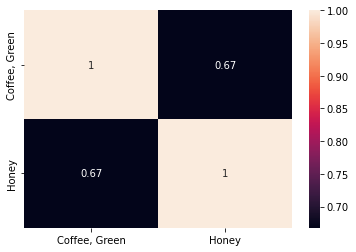

In [107]:
sns.heatmap(CoffeeHoneycorr.corr(), annot=True)

In [108]:
#there is no multicollinearity

In [109]:
#test for outliers

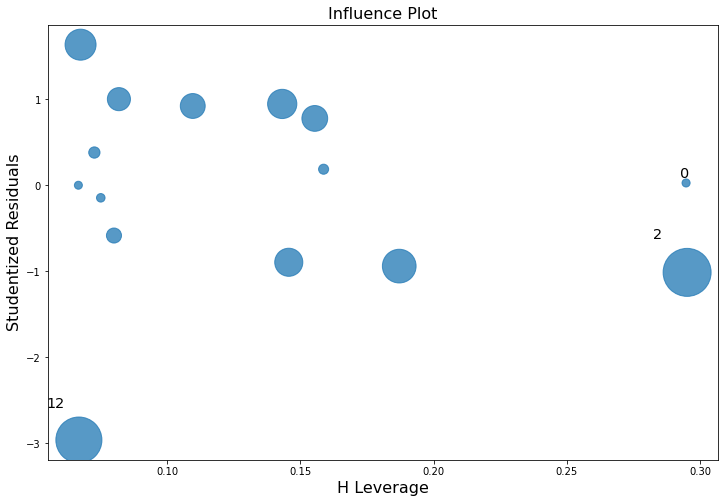

In [110]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, alpha = .05, ax = ax, criterion="cooks")

In [111]:
#there appear to be some residuals greater at -3

In [112]:
infl = model.get_influence()
print(infl.summary_frame())

    dfb_const     dfb_Honey       cooks_d  standard_resid  hat_diag  \
0   -0.014492  1.584866e-02  1.758171e-04        0.029008  0.294723   
1   -0.219232  2.523669e-01  5.751562e-02        0.790739  0.155385   
2    0.527013 -5.763087e-01  2.141195e-01       -1.011365  0.295114   
3   -0.089967  1.291038e-01  4.484015e-02        1.002808  0.081877   
4    0.109260 -4.843805e-02  8.583260e-02        1.540176  0.067484   
5   -0.016066  3.071890e-02  6.120330e-03        0.395246  0.072662   
6    0.008227 -1.381381e-02  9.218509e-04       -0.150720  0.075069   
7    0.000052 -3.122310e-07  7.348931e-08        0.001434  0.066667   
8    0.236142 -2.027451e-01  5.307684e-02        0.928710  0.109589   
9    0.317276 -2.830509e-01  7.556634e-02        0.951067  0.143164   
10  -0.091643  7.032557e-02  1.560820e-02       -0.599067  0.080022   
11   0.068905 -6.211171e-02  3.592931e-03        0.195181  0.158694   
12  -0.069396 -4.195461e-02  1.967367e-01       -2.343525  0.066854   
13  -0

In [113]:
#there are no student residuals over +/-3.0 (3x the mean of all the distances)

In [114]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Year   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     40.09
Date:                Sat, 16 Jul 2022   Prob (F-statistic):           2.61e-05
Time:                        09:32:16   Log-Likelihood:                -117.76
No. Observations:                  15   AIC:                             239.5
Df Residuals:                      13   BIC:                             240.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2193.5233   1229.927      1.783      0.098    -463.573    4850.619
Honey          0.0977      0.015      6.332      0.000       0.064       0.131
==============================================================================
Omnibus:                        2.226   Durbin-Watson:                   1.501
Prob(Omnibus):                  0.329   Jarque-Bera (JB):                1.001
Skew:                          -0.630   Prob(JB):                        0.606
Kurtosis:                       3.119   Cond. No.                     5.69e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
#p value - Prob(F-statistic) under .05 so there is a significant relationship between honey production and coffee production. Honey accounts for 73.6% of the change in coffee production (adj R-squared)

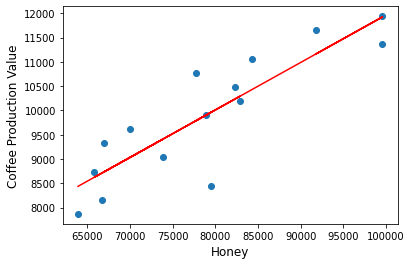

In [116]:
plt.scatter(x1,y)
 
y = 0.0977*x1 + 2193.5233
 
fig = plt.plot(x1,y, c='red', label = 'regression')
 
plt.xlabel('Honey', fontsize = 12)
 
plt.ylabel('Coffee Production Value', fontsize = 12)
 
plt.show()

In [117]:
#FORMULA y = 0.0977*x1 + 2193.5233 For linear relationship between Honey Production and Coffee Production